# ASHRAE - Great Energy Predictor III

### General Project / Past Competition Information
- Aim: (Accurately) Predicting energy consumption in commercial buildings.
- Dataset: over 1,000 buildings daat oer 3-years period.


### Issues & Questions
- Data size is big, not easy to process each time. Sampling? or Spark etc.

## 1. Libraries & Data Set-up

In [2]:
# !pip install pandas numpy matplotlib seaborn scikit-learn xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [4]:
train = pd.read_csv('/Users/meltemsahin/Documents/GitHub/ashrae-energy-prediction/data/train.csv')
building_metadata = pd.read_csv('/Users/meltemsahin/Documents/GitHub/ashrae-energy-prediction/data/building_metadata.csv')
weather_train = pd.read_csv('/Users/meltemsahin/Documents/GitHub/ashrae-energy-prediction/data/weather_train.csv')

test = pd.read_csv('/Users/meltemsahin/Documents/GitHub/ashrae-energy-prediction/data/test.csv')
weather_test = pd.read_csv('/Users/meltemsahin/Documents/GitHub/ashrae-energy-prediction/data/weather_test.csv')

In [5]:
print("-----------\nTrain Data:")
display(train.head())
print(train.info())
print(f'Size of train data: {train.shape}')
print("-----------\nBuilding Metadata:")
display(building_metadata.head())
print(building_metadata.info())
print(f'Size of building_metadata data: {building_metadata.shape}')
print("-----------\nWeather Train Data:")
display(weather_train.head())
print(weather_train.info())
print(f'Size of weather_train data: {weather_train.shape}')

'''
Size of train_df data (20216100, 4)
Size of weather_train_df data (139773, 9)
Size of weather_test_df data (277243, 9)
Size of building_meta_df data (1449, 6)
'''

-----------
Train Data:


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB
None
Size of train data: (20216100, 4)
-----------
Building Metadata:


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.1+ KB
None
Size of building_metadata data: (1449, 6)
-----------
Weather Train Data:


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB
None
Size of weather_train data: (139773, 9)


'\nSize of train_df data (20216100, 4)\nSize of weather_train_df data (139773, 9)\nSize of weather_test_df data (277243, 9)\nSize of building_meta_df data (1449, 6)\n'

### Merging train + building_metadata + weather_train -> 'train_merged'

In [6]:
train_merged = pd.merge(train, building_metadata, on='building_id', how='left')
train_merged = pd.merge(train_merged, weather_train, on=['site_id', 'timestamp'], how='left')

display(train_merged.head()) # train + building_metadata + weather_train 

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


### Checking missing data (train_merged)

In [ ]:
missing_values = train_merged.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])


total = train_merged.isnull().sum().sort_values(ascending = False)
percent = (train_merged.isnull().sum()/train_merged.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent (%)'])
missing__train_data.head(4)

Missing values in each column:
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64


,Total,Percent
floor_count,16709167,82.652772
year_built,12127645,59.990033
cloud_coverage,8825365,43.655131
precip_depth_1_hr,3749023,18.544739


In [8]:
# buildings with all features filled (not missing)
complete_buildings = train_merged.dropna()

display(complete_buildings.head())
print(f'Number of buildings with all features filled: {len(complete_buildings)}')

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
3021,565,0,2016-01-01 01:00:00,8.500,4,Education,15326,1954.0,2.0,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
3022,566,0,2016-01-01 01:00:00,0.521,4,Education,2010,1957.0,1.0,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
3023,569,0,2016-01-01 01:00:00,243.500,4,Education,86091,1964.0,8.0,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
3024,570,0,2016-01-01 01:00:00,79.488,4,Education,193202,1964.0,10.0,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1
3025,571,0,2016-01-01 01:00:00,16.750,4,Education,47954,1980.0,3.0,9.4,0.0,-2.2,0.0,1021.4,360.0,3.1


Number of buildings with all features filled: 321728


In [9]:
buildings_with_floor_count = train_merged[train_merged['floor_count'].notna()]
building_length = len(buildings_with_floor_count)
print(f'Number of buildings with non-missing floor count: {building_length}')

Number of buildings with non-missing floor count: 3506933


### Sampling (For faster processing)

In [145]:
train_sample = train_merged.sample(frac=0.1, random_state=42)
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2021610 entries, 14245562 to 466022
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int64  
 1   meter               int64  
 2   timestamp           object 
 3   meter_reading       float64
 4   site_id             int64  
 5   primary_use         object 
 6   square_feet         int64  
 7   year_built          float64
 8   floor_count         float64
 9   air_temperature     float64
 10  cloud_coverage      float64
 11  dew_temperature     float64
 12  precip_depth_1_hr   float64
 13  sea_level_pressure  float64
 14  wind_direction      float64
 15  wind_speed          float64
dtypes: float64(10), int64(4), object(2)
memory usage: 262.2+ MB


In [146]:
# remove zero meter readings
train_sample = train_sample[train_sample['meter_reading'] > 0]
train_sample['log_meter_reading'] = np.log1p(train_sample['meter_reading'])

In [147]:
# # outlier detection
# factor = 1.5
# Q1 = train_sample['log_meter_reading'].quantile(0.25)
# Q3 = train_sample['log_meter_reading'].quantile(0.75)
# IQR = Q3 - Q1 # interquartile range 0.25-0.75
# lower_bound = Q1 - factor * IQR
# upper_bound = Q3 + factor * IQR
# train_sample = train_sample[(train_sample['log_meter_reading'] >= lower_bound) &
#                             (train_sample['log_meter_reading'] <= upper_bound)]

In [148]:
# segmentation by Meter Type:
electric_data = train_sample[train_sample['meter'] == 0]
chilled_water_data = train_sample[train_sample['meter'] == 1]
steam_data = train_sample[train_sample['meter'] == 2]
hotwater_data = train_sample[train_sample['meter'] == 3]

Feature Selection (square_feet, primary_use, air_temperature, hour, etc.)

In [149]:
# feature engineering
train_sample['meter_reading_per_sqft'] = train_sample['meter_reading'] / train_sample['square_feet']

# Assignment 2

In [150]:
plt.style.use('ggplot')
color = 'darkblue'

1. Histogram - log_meter_reading distribution

Text(0.5, 1.0, 'Distribution of Log Meter Reading')

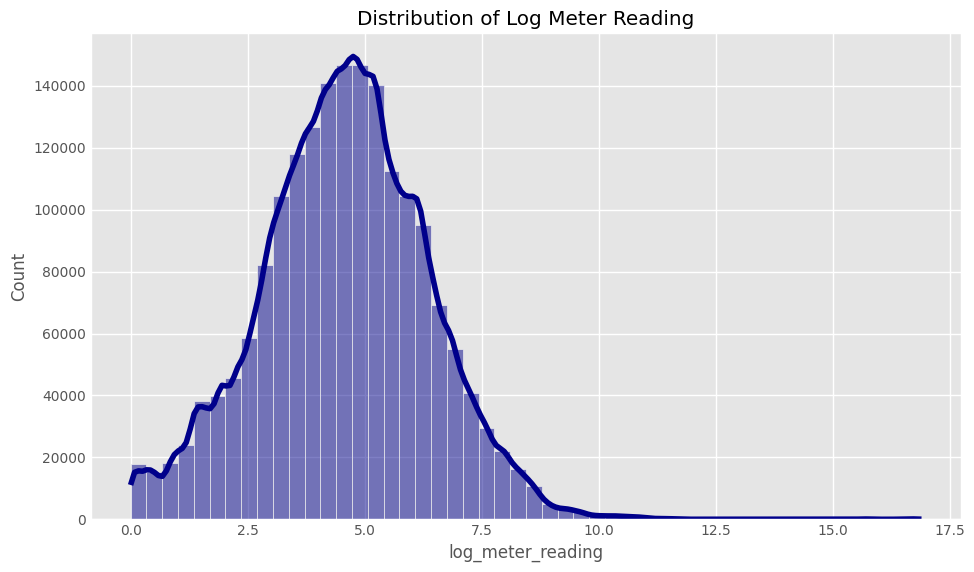

In [151]:
plt.figure(figsize=(10, 6))
sns.histplot(train_sample['log_meter_reading'], bins=50, kde=True, color=color)
plt.title('Distribution of Log Meter Reading')

2. Scatter Plot - relationship bw log_meter_reading and air_temperature

Text(0.5, 1.0, 'Log Meter Reading vs Air Temperature')

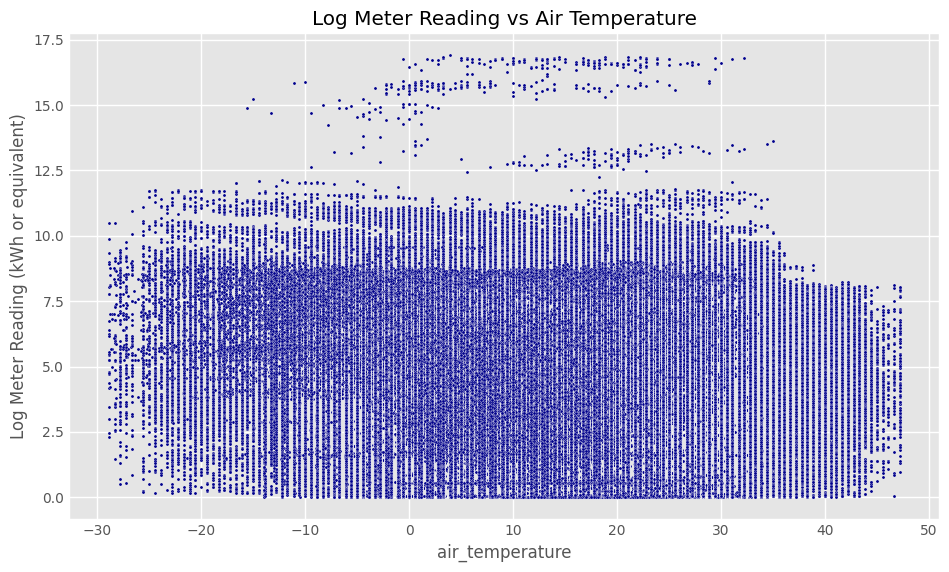

In [152]:
# still many zero (outlier removal + imputation needed?). some relationship between log_meter_reading and air_temperature (esp. above 0 temperature)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='air_temperature', y='log_meter_reading', data=train_sample, s=5, color=color)
plt.ylabel('Log Meter Reading (kWh or equivalent)')
plt.title('Log Meter Reading vs Air Temperature')

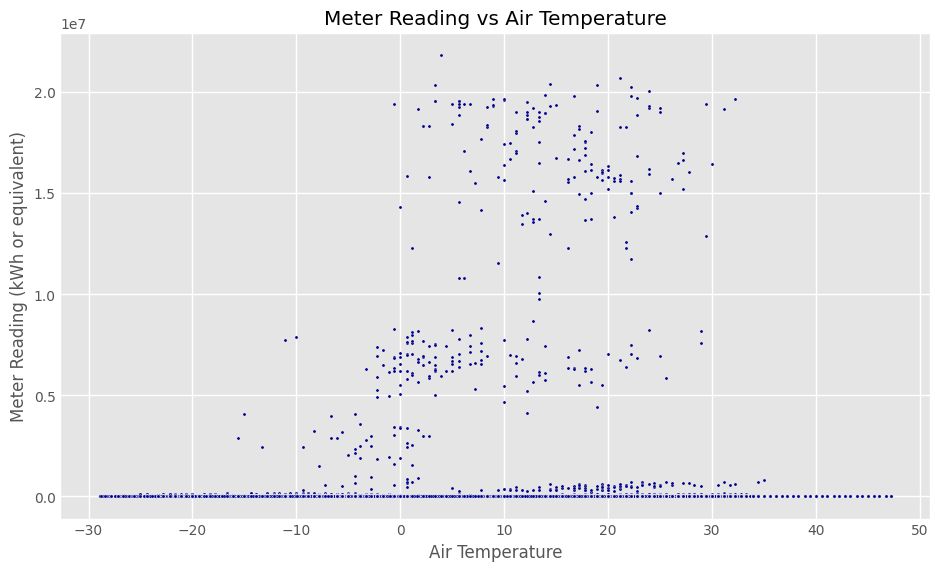

In [153]:
# raw meter data -> skewness, outliers, and clustering at zero.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='air_temperature', y='meter_reading', data=train_sample, s=5, color=color)
plt.title('Meter Reading vs Air Temperature')
plt.xlabel('Air Temperature')
plt.ylabel('Meter Reading (kWh or equivalent)')
filtered_meter_readings = train_sample[(train_sample['meter_reading'] > 0) & (train_sample['meter_reading'] <= 0.1)]
plt.show()

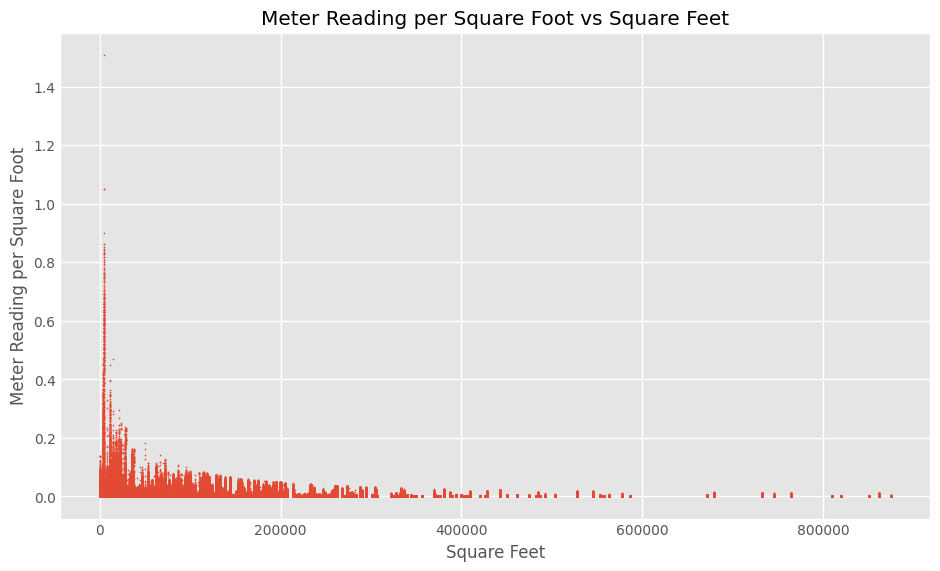

In [137]:
plt.figure(figsize=(10, 6))
plt.scatter(train_sample['square_feet'], train_sample['meter_reading_per_sqft'], s=0.5)
plt.xlabel('Square Feet')
plt.ylabel('Meter Reading per Square Foot')
plt.title('Meter Reading per Square Foot vs Square Feet')
plt.show()

3. Scatter plot - relationship between air_temperature and log_meter_reading.

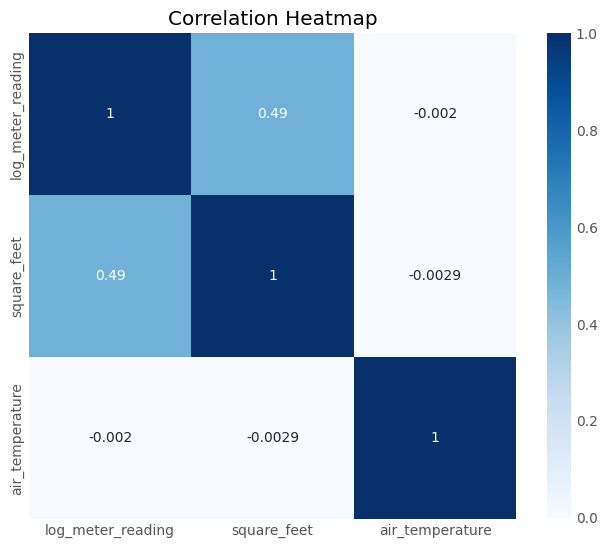

In [96]:
plt.figure(figsize=(7, 6))
corr = train_sample[['log_meter_reading', 'square_feet', 'air_temperature']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

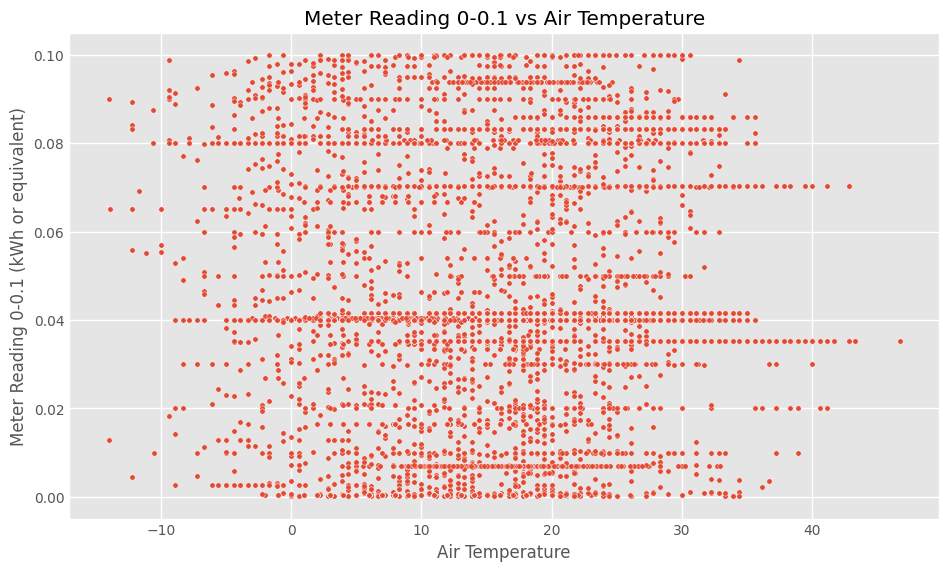

In [100]:
filtered_meter_readings = train_sample[(train_sample['meter_reading'] > 0) & (train_sample['meter_reading'] <= 0.1)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='air_temperature', y='meter_reading', data=filtered_meter_readings, s=15)
plt.title('Meter Reading 0-0.1 vs Air Temperature')
plt.xlabel('Air Temperature')
plt.ylabel('Meter Reading 0-0.1 (kWh or equivalent)')
plt.show()

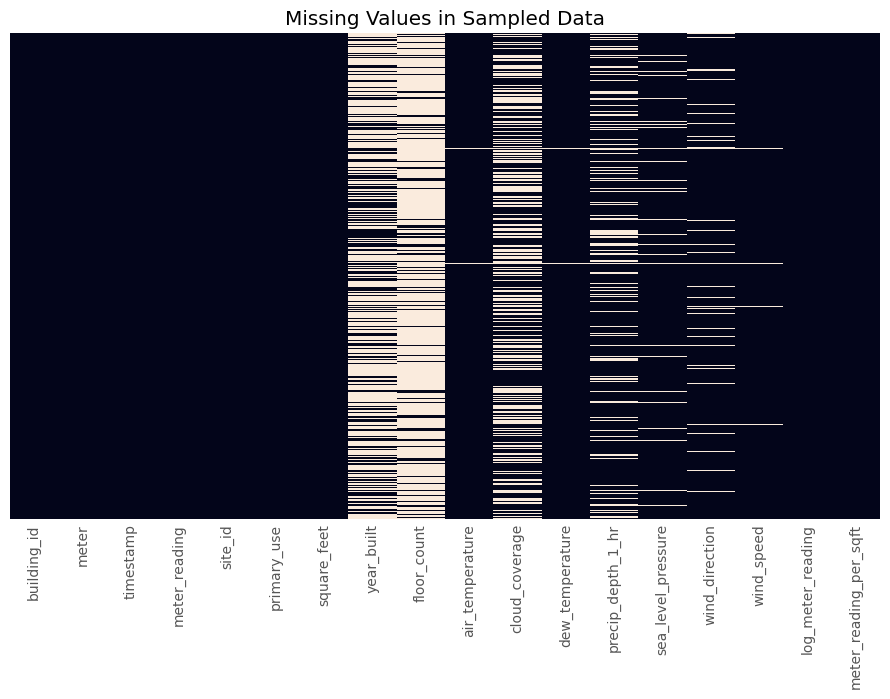

In [98]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_sample.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values in Sampled Data")
plt.show()

## Linear Regression Model

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

features = ['square_feet', 'air_temperature']
target = 'meter_reading'

X = train_sample[features]
y = train_sample[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
print(X_train.isnull().sum())

X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]

print(X_train.isnull().sum())
print(X_train.info())


square_feet           0
air_temperature    7808
dtype: int64
square_feet        0
air_temperature    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1609480 entries, 4896806 to 16851539
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   square_feet      1609480 non-null  int64  
 1   air_temperature  1609480 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 36.8 MB
None


In [80]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.3f}')

R² Score: 0.001


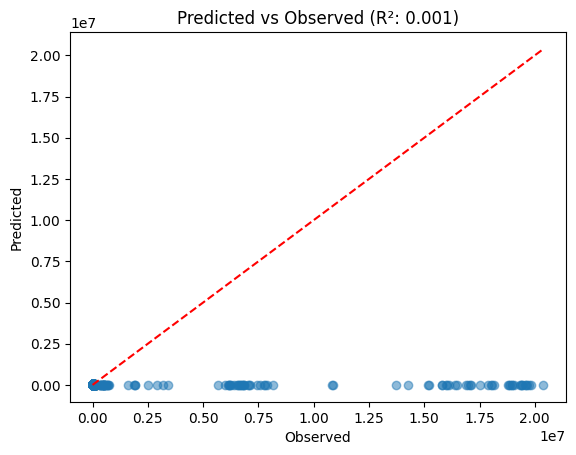

In [77]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f'Predicted vs Observed (R²: {r2:.3f})')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

In [82]:
train_sample.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
14245562,1324,1,2016-09-16 16:00:00,0.0000,14,Entertainment/public assembly,84688,NaN,NaN,21.1,NaN,10.0,0.0,1026.1,170.0,1.5
1282718,1013,0,2016-01-24 06:00:00,32.0001,10,Education,67377,NaN,3.0,0.6,NaN,0.0,3.0,1012.4,160.0,4.1
13883790,229,1,2016-09-10 07:00:00,567.6550,2,Education,140092,NaN,NaN,33.3,4.0,13.3,0.0,1009.6,320.0,2.6
4781820,217,3,2016-04-01 01:00:00,0.0000,2,Education,282946,2003.0,NaN,21.7,NaN,-5.6,0.0,1009.3,240.0,5.7
10415393,1434,0,2016-07-10 04:00:00,65.7500,15,Education,33148,1967.0,NaN,19.4,NaN,14.4,NaN,1010.1,240.0,2.1


### Accuracy VS Complexity

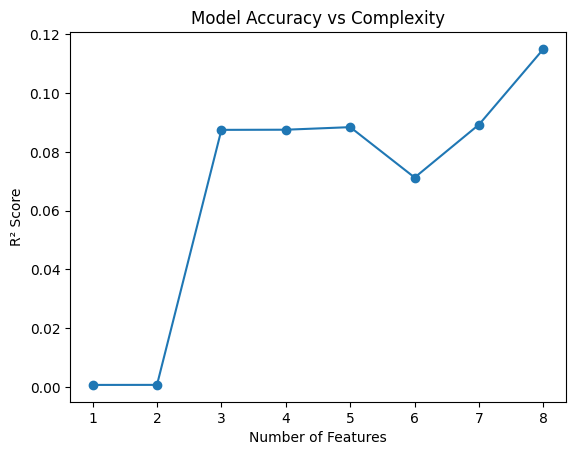

In [ ]:
features = ['square_feet', 'air_temperature', 'year_built', 'wind_speed', 'wind_direction', 'cloud_coverage', 'precip_depth_1_hr', 'dew_temperature']
accuracy_scores = []

for i in range(1, len(features) + 1):
    selected_features = features[:i]
    X = train_sample[selected_features]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train = X_train.dropna()
    y_train = y_train[X_train.index]

    X_test = X_test.dropna()
    y_test = y_test[X_test.index]

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate accuracy
    y_pred = model.predict(X_test)
    accuracy_scores.append(r2_score(y_test, y_pred))

plt.plot(range(1, len(features) + 1), accuracy_scores, marker='o')
plt.title('Model Accuracy vs Complexity')
plt.xlabel('Number of Features')
plt.ylabel('R² Score')
plt.show()

## 2. Exploratory Data Analysis (EDA)

In [ ]:
print("Meter Reading Statistics:")
display(train_merged['meter_reading'].describe())

# distribution
sns.heatmap(train_merged.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values in Merged Data")
plt.show()

Meter Reading Statistics:


count    2.021610e+07
mean     2.117121e+03
std      1.532356e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

Text(0, 0.5, 'meter_reading')

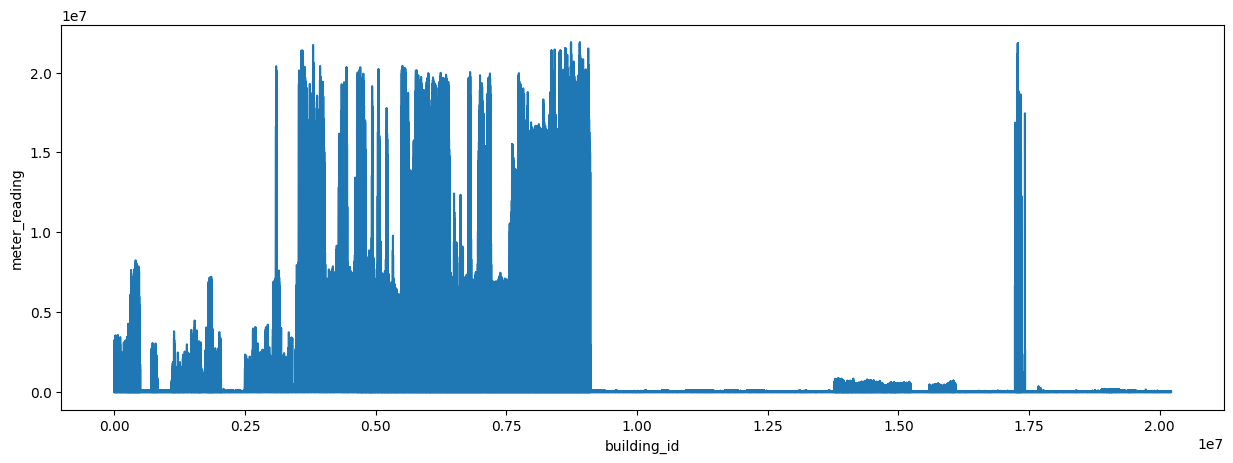

In [ ]:
plt.figure(figsize = (15,5))
train_merged['meter_reading'].plot()
plt.xlabel('building_id')
plt.ylabel('meter_reading')

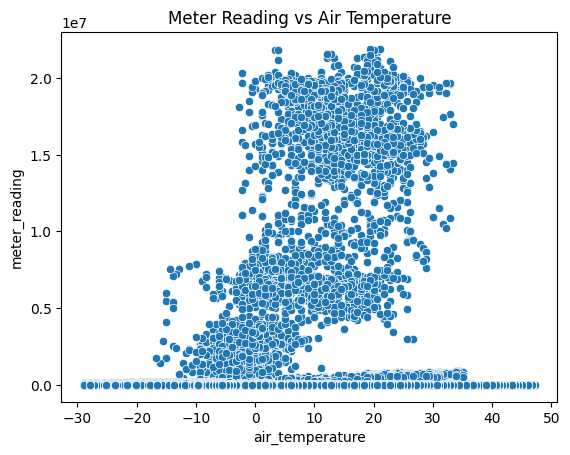

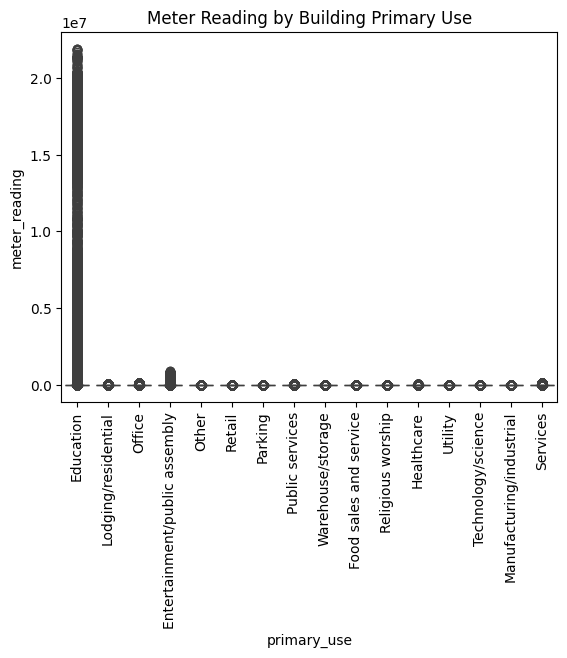

In [9]:
# Scatterplot: Meter reading vs Air Temperature
sns.scatterplot(x='air_temperature', y='meter_reading', data=train_merged)
plt.title('Meter Reading vs Air Temperature')
plt.show()

# Boxplot: Meter reading by Building Primary Use
sns.boxplot(x='primary_use', y='meter_reading', data=train_merged)
plt.xticks(rotation=90)
plt.title('Meter Reading by Building Primary Use')
plt.show()

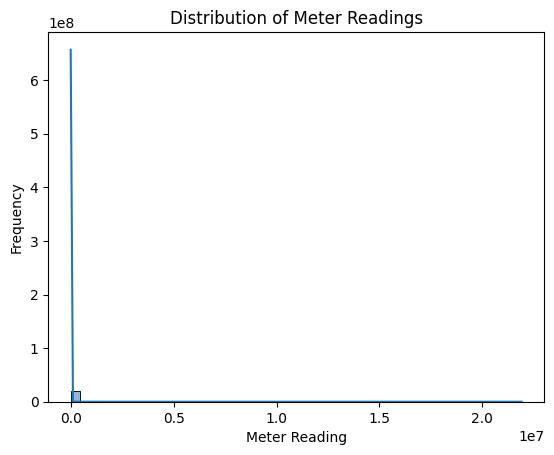

In [14]:
sns.histplot(train_merged['meter_reading'], bins=50, kde=True)
plt.title('Distribution of Meter Readings')
plt.xlabel('Meter Reading')
plt.ylabel('Frequency')
plt.show()

## Init Preprocessing

In [10]:
train_merged['air_temperature'].fillna(train_merged['air_temperature'].median(), inplace=True)

# add meaningful feautures
train_merged['hour'] = pd.to_datetime(train_merged['timestamp']).dt.hour
train_merged['day_of_week'] = pd.to_datetime(train_merged['timestamp']).dt.dayofweek

/var/folders/kk/rx99trsd64s0kj15czcfjmnh0000gn/T/ipykernel_59399/669566197.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_merged['air_temperature'].fillna(train_merged['air_temperature'].median(), inplace=True)
